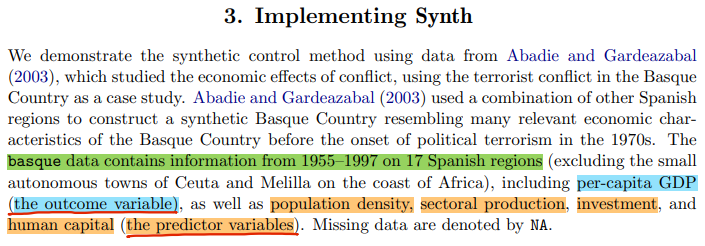

In [1]:
library(Synth)
library(stargazer)

data(basque)
stargazer(basque, type = "text")

##
## Synth Package: Implements Synthetic Control Methods.


## See https://web.stanford.edu/~jhain/synthpage.html for additional information.




Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





Statistic              N    Mean    St. Dev.    Min      Max    
----------------------------------------------------------------
regionno              774   9.500     5.191      1        18    
year                  774 1,976.000  12.418    1,955    1,997   
gdpcap                774   5.395     2.243    1.243    12.350  
sec.agriculture       90   20.268    10.376    1.320    46.500  
sec.energy            90    5.189     4.035    1.600    21.360  
sec.industry          90   23.915     9.282    9.560    46.220  
sec.construction      90    7.212     1.362    4.340    11.280  
sec.services.venta    90   36.485     7.261   26.230    58.210  
sec.services.nonventa 90    6.935     1.978    3.430    13.110  
school.illit          108  308.051   630.842   8.098  2,863.278 
school.prim           108 2,118.525 4,216.780 151.321 19,459.560
school.med            108  145.614   297.452   8.610  1,696.147 
school.high           108  45.943    92.107    3.063   474.941  
school.post.high      10

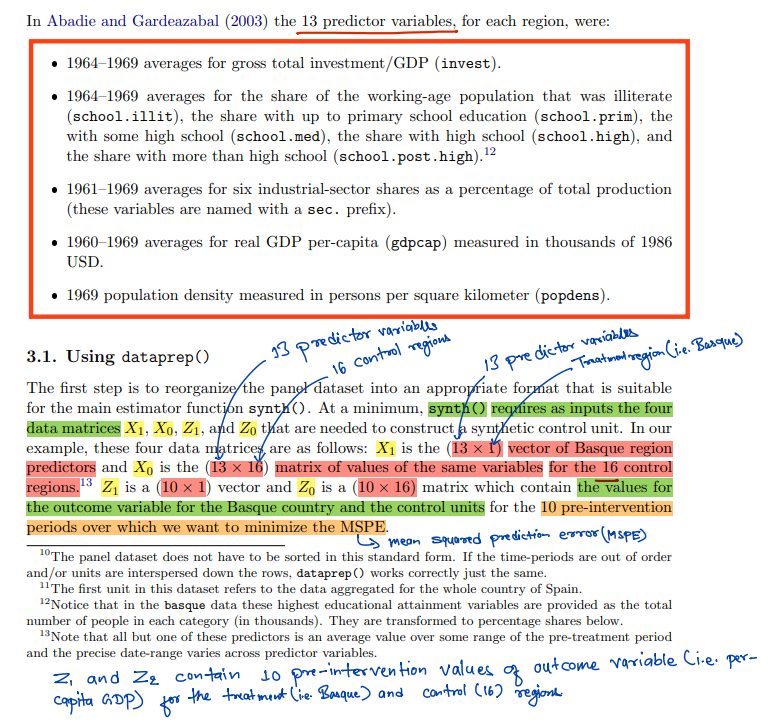

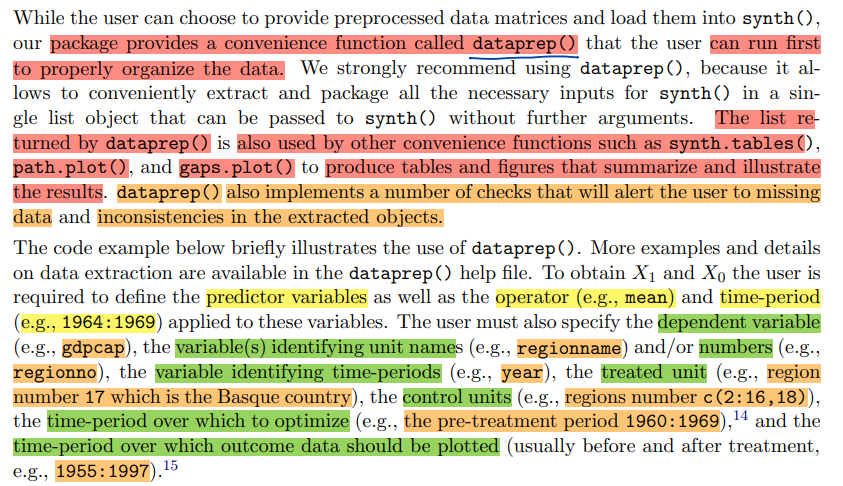

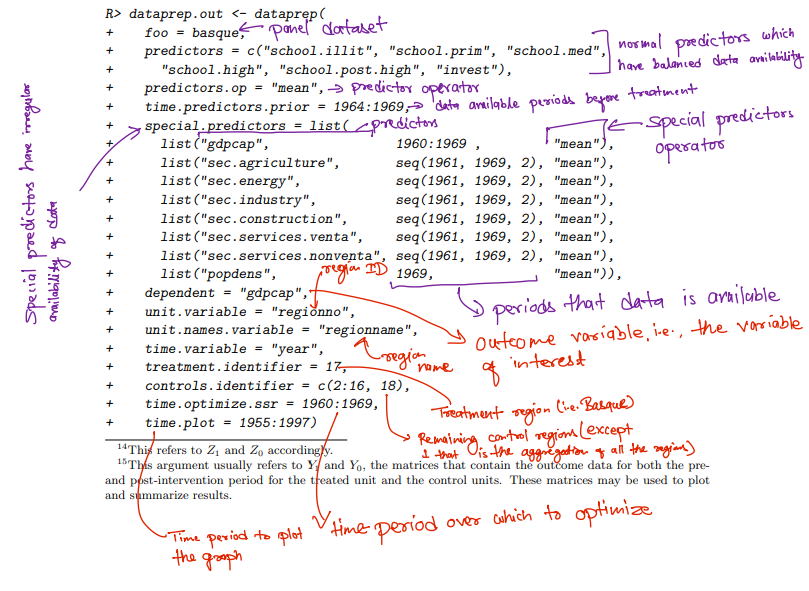

In [2]:
 dataprep.out <- dataprep(foo = basque,
                          predictors = c("school.illit", "school.prim", "school.med",
                                         "school.high", "school.post.high", "invest"),
                          predictors.op = "mean",
                          time.predictors.prior = 1964:1969,
                          special.predictors = list(
                              list("gdpcap", 1960:1969 , "mean"),
                              list("sec.agriculture", seq(1961, 1969, 2), "mean"),
                              list("sec.energy", seq(1961, 1969, 2), "mean"),
                              list("sec.industry", seq(1961, 1969, 2), "mean"),
                              list("sec.construction", seq(1961, 1969, 2), "mean"),
                              list("sec.services.venta", seq(1961, 1969, 2), "mean"),
                              list("sec.services.nonventa", seq(1961, 1969, 2), "mean"),
                              list("popdens", 1969, "mean")),
                          dependent = "gdpcap",
                          unit.variable = "regionno",
                          unit.names.variable = "regionname",
                          time.variable = "year",
                          treatment.identifier = 17,
                          controls.identifier = c(2:16, 18),
                          time.optimize.ssr = 1960:1969,
                          time.plot = 1955:1997)

In [3]:
print(dataprep.out[c('X1', #Vector of pre-treatment mean values of predictors for treatment region i.e. Basque
                     'X0', #Matrix of pre-treatment mean values of predictors for control regions
                     'Z1', #Vector of pre-treatment periods outcome variable (i.e. gdpcap) value treatment region
                     'Z0')]) #Matrix of pre-treatment periods outcome variable value for control regions

$X1
                                                 17
school.illit                              39.888465
school.prim                             1031.742299
school.med                                90.358668
school.high                               25.727525
school.post.high                          13.479720
invest                                    24.647383
special.gdpcap.1960.1969                   5.285468
special.sec.agriculture.1961.1969          6.844000
special.sec.energy.1961.1969               4.106000
special.sec.industry.1961.1969            45.082000
special.sec.construction.1961.1969         6.150000
special.sec.services.venta.1961.1969      33.754000
special.sec.services.nonventa.1961.1969    4.072000
special.popdens.1969                     246.889999

$X0
                                                  2          3          4
school.illit                             863.389160  73.121226  31.488423
school.prim                             3062.424886 728.578929 

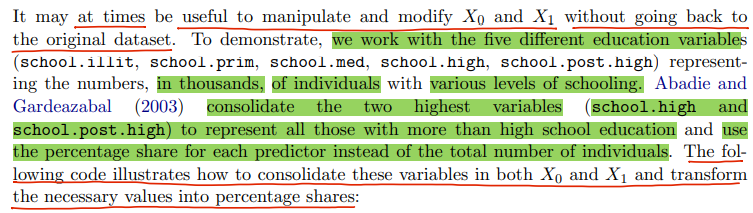

In [4]:
# ======================================================================
# Calculating % of literacy categories to the total population i.e.
# (literacy category)/(school.illit + school.prim + school.med + school.high + school.post.high) * 100
# High school categories, i.e. school.high and school.post.high, are combined into one category.
# ======================================================================

dataprep.out$X1["school.high",] <- dataprep.out$X1["school.high",] + dataprep.out$X1["school.post.high",]
row2delete <- which(rownames(dataprep.out$X1) == "school.post.high")
dataprep.out$X1 <- as.matrix(dataprep.out$X1[-row2delete,])

dataprep.out$X0["school.high",] <- dataprep.out$X0["school.high",] + dataprep.out$X0["school.post.high",]
row2delete <- which(rownames(dataprep.out$X0) == "school.post.high")
dataprep.out$X0 <- dataprep.out$X0[-row2delete,]

lowest <- which(rownames(dataprep.out$X0) == "school.illit")
highest <- which(rownames(dataprep.out$X0) == "school.high")
dataprep.out$X1[lowest:highest,] <- (100 * dataprep.out$X1[lowest:highest,]) / sum(dataprep.out$X1[lowest:highest,])
dataprep.out$X0[lowest:highest,] <- 100 * scale(dataprep.out$X0[lowest:highest,], center = FALSE, scale = colSums(dataprep.out$X0[lowest:highest,]))

In [5]:
synth.out <- synth(data.prep.obj = dataprep.out, method = "BFGS")


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.008864629 

solution.v:
 0.01556808 0.001791073 0.04417159 0.03409436 8.45034e-05 0.2009837 0.09484593 0.007689228 0.1339499 0.008723843 0.009680725 0.1081258 0.3402913 

solution.w:
 4.92e-08 5.17e-08 1.352e-07 2.85e-08 5.32e-08 5.177e-07 5.24e-08 7.29e-08 0.8507986 2.274e-07 4.03e-08 9.51e-08 0.1491998 5.61e-08 9.02e-08 1.061e-07 



In [6]:
# Actual GDPPC of tereatment region  (i.e. Actual Basque)
actual_Y1 <- dataprep.out$Y1plot
head(actual_Y1)

#Actual GDPPC of control regions
head(dataprep.out$Y0plot)

#SCM weights for each region
head(synth.out$solution.w)

#synthetic GDPPC of treatment region (i.e. Synthetic Basque) obtained
# by matrix multiplication of actual GDPPC of control regions and their respective SCM weights
synthetic_Y1 <- dataprep.out$Y0plot %*% synth.out$solution.w

# gap between Actual and Synthetic Basque
gap <- actual_Y1 - synthetic_Y1
head(gap)

,17
1955,3.853185
1956,3.945658
1957,4.033562
1958,4.023422
1959,4.013782
1960,4.285918


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18
1955,1.688732,2.288775,2.502928,3.143959,1.914382,2.559412,1.729149,1.327764,3.546630,2.575978,1.243430,1.634676,4.594473,1.679520,2.555127,2.390460
1956,1.758498,2.445159,2.615538,3.347758,2.071837,2.693873,1.838332,1.415096,3.690446,2.738503,1.332548,1.725578,4.786632,1.764282,2.698158,2.535204
1957,1.827621,2.603399,2.725793,3.549629,2.226078,2.820337,1.947658,1.503570,3.826835,2.899886,1.422451,1.816481,4.963439,1.850328,2.839831,2.680020
1958,1.852756,2.639032,2.751857,3.642673,2.220866,2.879035,1.971365,1.531420,3.875678,2.963510,1.440231,1.840903,4.906170,1.887389,2.881891,2.726435
1959,1.878035,2.677092,2.777421,3.734862,2.213439,2.943730,1.995144,1.559340,3.921737,3.026207,1.458083,1.865396,4.846401,1.924093,2.930877,2.772851
1960,2.010140,2.881462,2.967295,4.058841,2.357684,3.137032,2.138817,1.667524,4.241788,3.219294,1.535847,1.983290,5.161097,2.118609,3.163525,2.969866


,w.weight
2,4.921274e-08
3,5.169827e-08
4,1.352267e-07
5,2.853779e-08
6,5.323209e-08
7,5.177271e-07


,17
1955,0.150218957
1956,0.091663836
1957,0.037147612
1958,-0.006003578
1959,-0.045912501
1960,-0.093028265


In [7]:
synth.tables <- synth.tab(dataprep.res = dataprep.out, synth.res = synth.out)
print(synth.tables$tab.loss)

        Loss W      Loss V
[1,] 0.2466976 0.008864629


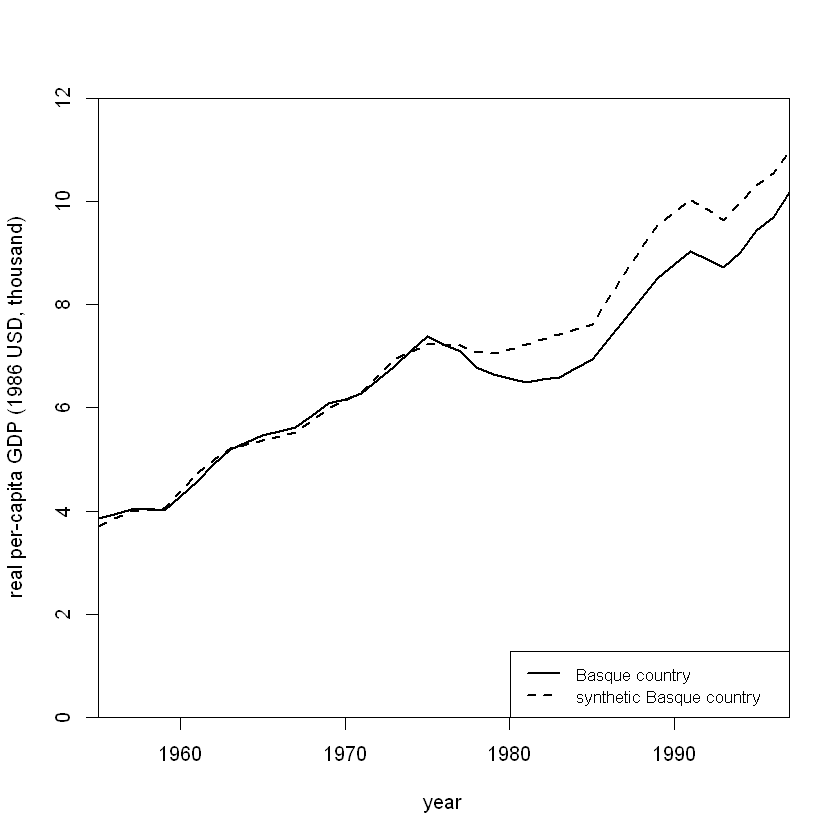

In [8]:
path.plot(synth.res = synth.out, dataprep.res = dataprep.out, 
          Ylab = "real per-capita GDP (1986 USD, thousand)", Xlab = "year", 
          Ylim = c(0, 12), Legend = c("Basque country", "synthetic Basque country"), 
          Legend.position = "bottomright")

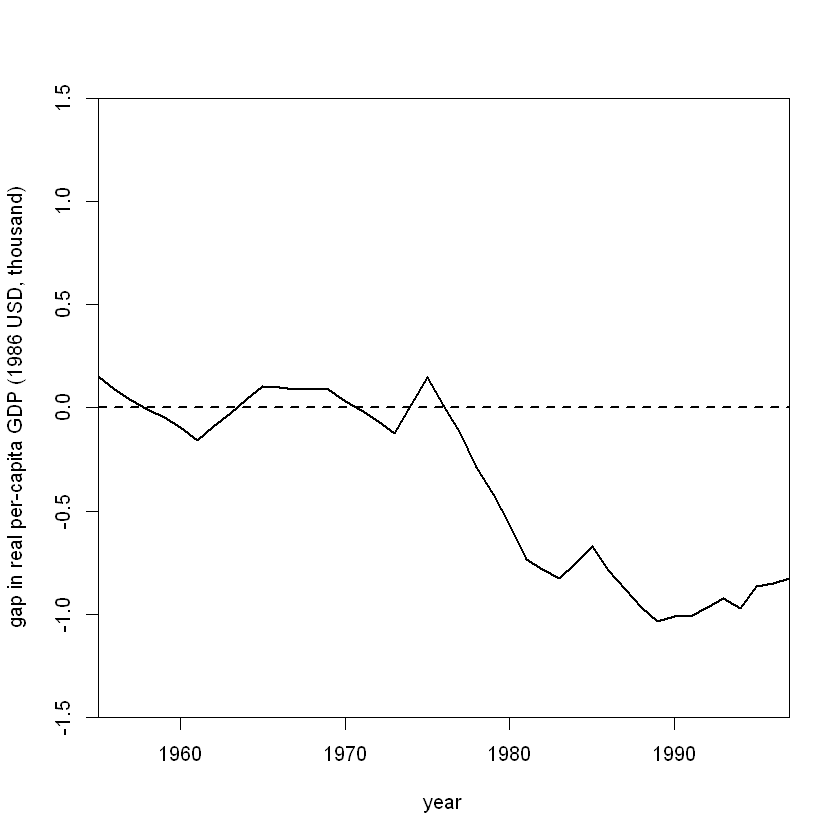

In [10]:
gaps.plot(synth.res = synth.out, dataprep.res = dataprep.out, Ylab = "gap in real per-capita GDP (1986 USD, thousand)", Xlab = "year", Ylim = c(-1.5, 1.5), Main = NA)
